### Song based sentiment analysis using Textblob

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import nltk
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#Samaras Laptop
#song_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\DIE_DATEN\datensatz.csv')
#song_data = song_data[(song_data['Language'] == 'en')]
#song_data.to_csv("outData.csv", index=False)
#song_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\outData.csv')


#Anjas Laptop
# song_data = pd.read_csv('../Daten/train.csv')
# song_data = song_data[(song_data['Language'] == 'en')]
# song_data.to_csv("../Daten/outData.csv", index=False)
song_data = pd.read_csv('../Daten/cleanedData.csv')

## Get a balanced sample of n songs per genre

In [3]:
num_genres = song_data.Genre.nunique()
num_topics = num_genres

In [4]:
song_data = song_data[["Genre", "Lyrics"]]
song_data = song_data.groupby('Genre').sample(1000).reset_index(drop=True)
song_data.head(10)

,Genre,Lyrics
0,Country,"Not that long ago, I was on the run People tel..."
1,Country,Song sung blue everybody knows one Song sung b...
2,Country,Joy at the start Fear in the journey Joy in th...
3,Country,She's a warm summer breeze with bleach blonde ...
4,Country,Wrong side of town on the second floor Couple ...
5,Country,"I cried a tear, you wiped it dry I was confuse..."
6,Country,Everyone has heard me say I don't miss her muc...
7,Country,Let's drink a toast to what might've been To a...
8,Country,I'd rather live a life of lies and fantasy Tha...
9,Country,Me and Billy Joe and Mary Beth Were raised up ...


## Remove punctuation/lower casing

In [5]:
song_data_processed = song_data.copy()
song_data_processed['Lyrics'] = song_data_processed['Lyrics'].map(lambda x: re.sub('[,\.!?]', '', x))
song_data_processed['Lyrics'] = song_data_processed['Lyrics'].map(lambda x: x.lower())

## Remove stopwords and Tokenize

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anjan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
song_data_processed['Sentiment'] = song_data_processed['Lyrics'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
song_data_processed['Subjectivity'] = song_data_processed['Lyrics'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

In [8]:
song_data_processed

,Genre,Lyrics,Sentiment,Subjectivity
0,Country,not that long ago i was on the run people tell...,0.099603,0.702778
1,Country,song sung blue everybody knows one song sung b...,0.051389,0.276984
2,Country,joy at the start fear in the journey joy in th...,0.177500,0.220000
3,Country,she's a warm summer breeze with bleach blonde ...,0.116606,0.373687
4,Country,wrong side of town on the second floor couple ...,0.042812,0.417893
...,...,...,...,...
9995,Rock,thanks to the rolling rolling rolling thanks t...,0.297101,0.329710
9996,Rock,when was the last time you kissed me\nand i do...,0.211458,0.387847
9997,Rock,he just threw out all of his old clothes\nand ...,0.170455,0.393182
9998,Rock,stay away from why don't you just set me free ...,0.031250,0.434375


### Explore the results

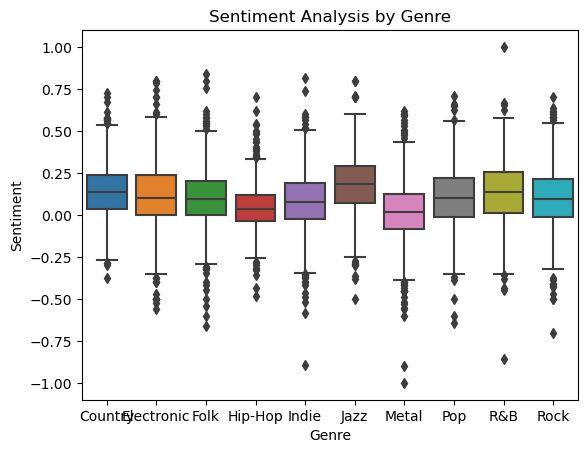

In [9]:
sns.boxplot(x='Genre', y='Sentiment', data=song_data_processed)
plt.title('Sentiment Analysis by Genre')
plt.show()

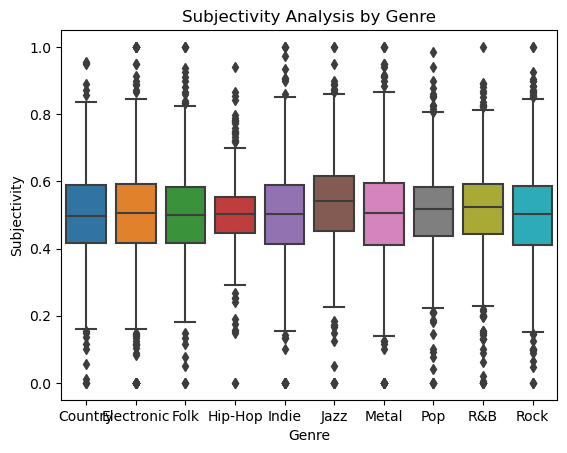

In [10]:
sns.boxplot(x='Genre', y='Subjectivity', data=song_data_processed)
plt.title('Subjectivity Analysis by Genre')
plt.show()

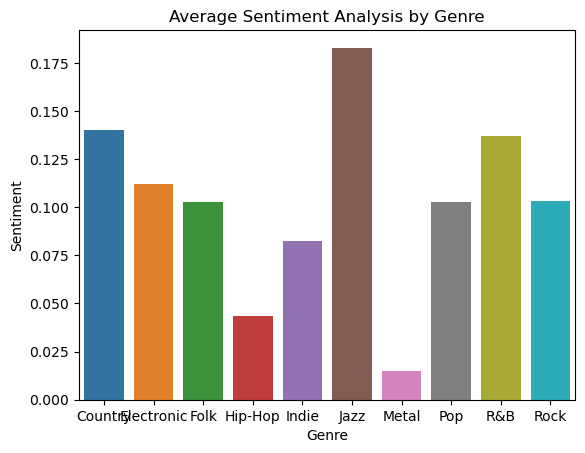

In [11]:
sns.barplot(x='Genre', y='Sentiment', data=song_data_processed, errorbar=None)
plt.title('Average Sentiment Analysis by Genre')
plt.show()

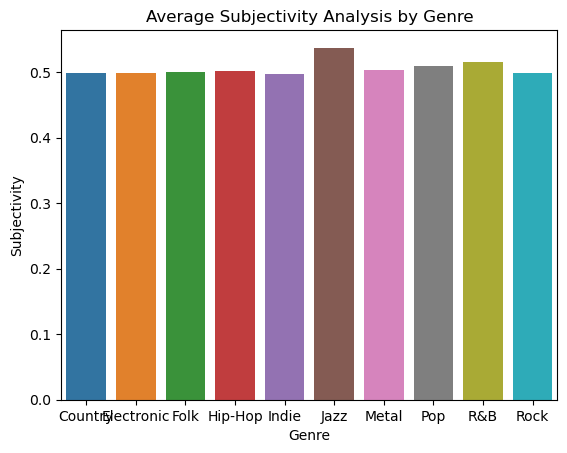

In [12]:
sns.barplot(x='Genre', y='Subjectivity', data=song_data_processed, errorbar=None)
plt.title('Average Subjectivity Analysis by Genre')
plt.show()

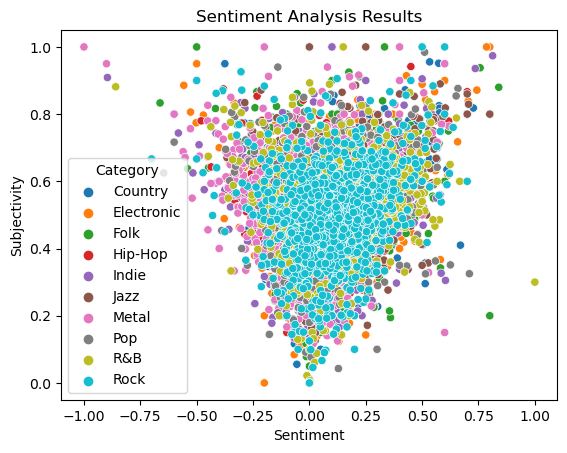

In [13]:
#Scatter Plot
sns.scatterplot(x='Sentiment', y='Subjectivity', hue='Genre', data=song_data_processed)
plt.title('Sentiment Analysis Results')
plt.legend(title='Category')
plt.show()

## Trying classification

In [14]:
X = song_data_processed[["Sentiment", "Subjectivity"]]
label_encoder = LabelEncoder()
song_data_processed["GenreID"] = label_encoder.fit_transform(song_data_processed["Genre"])
y = song_data_processed["GenreID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
#K-nearest neighbors
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.131

In [16]:
#svm classifier
svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.16

In [17]:
#Random forest
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.13166666666666665

### Get Classification Matrix (of random forest)

In [18]:
y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.12      0.11      0.11       318
           1       0.15      0.15      0.15       308
           2       0.09      0.10      0.10       288
           3       0.19      0.20      0.19       303
           4       0.13      0.11      0.12       320
           5       0.26      0.28      0.27       290
           6       0.11      0.12      0.11       292
           7       0.08      0.08      0.08       292
           8       0.11      0.10      0.11       324
           9       0.07      0.08      0.08       265

    accuracy                           0.13      3000
   macro avg       0.13      0.13      0.13      3000
weighted avg       0.13      0.13      0.13      3000



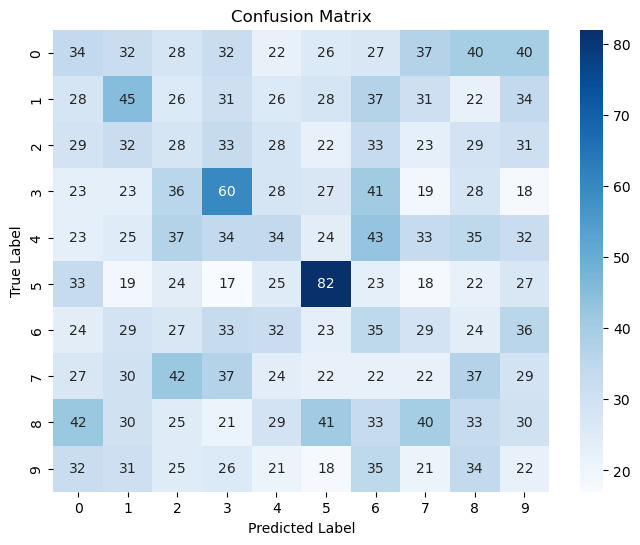

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Get the class labels
class_labels = rf.classes_

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
song_data_processed[["Genre", "GenreID"]].drop_duplicates()

,Genre,GenreID
0,Country,0
1000,Electronic,1
2000,Folk,2
3000,Hip-Hop,3
4000,Indie,4
5000,Jazz,5
6000,Metal,6
7000,Pop,7
8000,R&B,8
9000,Rock,9


### Was hier gemacht wurde:
- Nehmen eines song subsets mit jeweils n songs aus jedem der m genres
- Bereinigen der Lyrics mit verschiedenen Preprocessing methoden (Best Practice)
- Anwendung der sentiment analyse mithilfe der python textblob bibliothekt (Ergebnis in form von polarity & subjectivity)
- Investigating whether there is a correlation between the sentiments and the song genres, using boxplots, barcharts and Scatterplots
- Investigating whether it is possible to predict a genre based on its sentiments

### Ergebnis
- Die meisten songgenres können grundsätzlich positive als auch negative grundsentiments haben
- vor allem Metall und HipHop sind tendenziell eher negativer (was erwartungsgemäß ist), dieser unterschied ist jedoch nicht extrem groß
- Tendenziell sind song sentiments eher positiv
- Im bezug auf subjektivität sind die meisten songs eher neutral (und auch ähnlich neutral)
- Der Scatterplot zeigt, dass durch Sentiment und Subjektivität alleine keine differenzierung der songgenres möglich ist
- Dieses Ergebnis wird bestätigt durch die Anwendung verschiedener Klassifikationsverfahren, die maximal eine accuracy von 0.14 haben
- Bei Betrachtung der Confusion Matrix und des classification reports wird auch hier sichtbar, dass HipHop am besten predicted werden kann. Warum das so ist, kann allein durch betrachtung der Sentiment Analysis Daten allerdings nicht genau ermittelt werden.

### Interpretation
- Obwohl wenige genres tendenziell negativer sind, kann man grundsätzlich vom Song basierten sentiment nicht auf die gesamtheit eines genres schließen. dafür sind lieder innerhalb von genres zu unterschiedlich in ihrer grundstimmung
